# Topic : Human body heart stroke prediction system using various prediction algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Data

In [3]:
df = pd.read_csv('HRV_Based Cardiac_arrest_smokers.csv')

In [4]:
df.head()

,SBP,DBP,Mean HR,Mean RR,SDNN,RMSSD,TP,LF(ms2),HF(ms2),LF(nu),HF(nu),LF/HF,SD1,SD2,SD1/SD2,DFA Alpha 1,DFA Alpha 2,AppEN,SampEN,Result
0,128.845712,88.722778,85.123808,514.273876,23.669941,16.804051,2299.696340,997.684144,349.652751,76.307577,22.850611,3.102062,12.992214,36.891878,0.122058,1.021195,0.784922,0.446175,1.069270,1
1,127.927398,87.670022,87.486723,551.557775,31.539156,17.130374,2235.866893,1113.110296,333.526167,76.890496,21.587769,2.997937,11.414109,40.309870,0.134849,0.912579,0.803079,0.386453,1.060359,1
2,126.919674,86.092977,83.179963,574.209392,32.602815,18.697896,2348.223598,1017.603806,333.286129,74.602271,22.552932,3.193798,10.708451,33.170656,0.124430,1.075274,0.799011,0.516678,1.092024,1
3,123.902447,87.665186,84.027245,565.037195,31.815561,9.844326,2347.263047,1021.685903,333.855820,76.001453,22.637945,3.018426,10.761679,33.153156,0.026149,1.165473,0.806971,0.349478,1.110636,1
4,125.780293,83.292150,88.043730,559.625145,26.870244,20.396533,2228.310189,1004.497359,338.013286,75.243650,22.171455,3.153129,10.556777,40.039957,0.154317,1.131635,0.795661,0.653466,1.063307,1


In [5]:
df.shape

(1562, 20)

In [6]:
# Checking if data has any null Values

In [7]:
missing_values = df.isnull().sum()
missing_values

SBP            0
DBP            0
Mean HR        0
Mean RR        0
SDNN           0
RMSSD          0
TP             0
LF(ms2)        0
HF(ms2)        0
LF(nu)         0
HF(nu)         0
LF/HF          0
SD1            0
SD2            0
SD1/SD2        0
DFA Alpha 1    0
DFA Alpha 2    0
AppEN          0
SampEN         0
Result         0
dtype: int64

In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,SBP,DBP,Mean HR,Mean RR,SDNN,RMSSD,TP,LF(ms2),HF(ms2),LF(nu),HF(nu),LF/HF,SD1,SD2,SD1/SD2,DFA Alpha 1,DFA Alpha 2,AppEN,SampEN,Result


In [9]:
df_clean = df.drop_duplicates()


In [10]:
df_clean.shape

(1562, 20)

In [11]:
df_clean.describe()

,SBP,DBP,Mean HR,Mean RR,SDNN,RMSSD,TP,LF(ms2),HF(ms2),LF(nu),HF(nu),LF/HF,SD1,SD2,SD1/SD2,DFA Alpha 1,DFA Alpha 2,AppEN,SampEN,Result
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,124.138179,81.204658,82.296498,620.758491,48.264301,32.482193,2356.406282,1030.693492,369.148840,75.164744,23.516578,2.998453,18.260735,42.204030,0.230248,1.155671,0.900237,0.813701,1.209177,0.519206
std,3.886079,6.473739,5.971782,102.760991,24.548472,21.754757,137.650963,69.820139,34.337472,1.029823,1.536721,0.145655,8.013612,7.731731,0.140389,0.180417,0.119658,0.335100,0.124497,0.499791
min,113.450000,66.160000,69.928049,496.020217,17.907398,9.645456,2148.423574,756.545600,326.888304,72.345000,20.126025,2.157081,10.160281,30.381339,0.014347,0.912313,0.734000,0.325558,1.060169,0.000000
25%,122.387816,76.170372,77.794473,536.716670,28.088590,15.449133,2250.945902,988.846128,341.621141,74.381872,22.372668,2.885209,12.088114,35.822073,0.113578,1.022316,0.810065,0.537164,1.114108,0.000000
50%,124.986198,83.346667,83.349890,576.911414,38.459935,21.022627,2322.707921,1036.216224,352.748046,75.070554,23.138541,3.020115,13.908910,40.933891,0.205836,1.113897,0.838380,0.744297,1.158176,1.000000
75%,127.207865,86.479819,87.157602,703.276815,68.883478,49.138832,2428.521986,1083.624435,398.502184,75.853689,24.615211,3.116815,24.454855,48.944250,0.350439,1.260668,0.985517,1.079001,1.306474,1.000000
max,129.573605,89.992943,91.454737,844.554012,101.388252,82.240591,2699.661497,1154.485265,441.586550,77.284510,27.142633,3.226458,36.872699,57.183816,0.501218,1.599982,1.184515,1.516406,1.493123,1.000000


In [12]:
count = df['Result'].value_counts()
count

Result
1    811
0    751
Name: count, dtype: int64

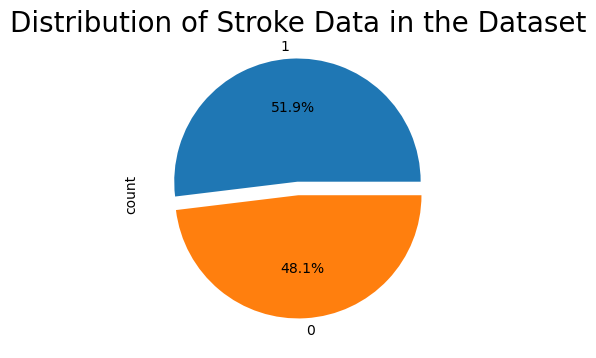

In [13]:
df["Result"].value_counts().plot.pie(figsize=(4,4),explode=(0.1,0.01),autopct="%1.1f%%")
plt.title("Distribution of Stroke Data in the Dataset",fontsize=20)
plt.show()

In [14]:
# Data is clean and uniform,so no need for normalisation

In [15]:
# fig=plt.figure(figsize=(7,7),dpi=100)
# sns.pairplot(df,hue="Result",palette='RdPu');
# sns.pairplot(df, hue='Result')

In [16]:
x= df.drop('Result',axis=1)
x.shape

(1562, 19)

In [17]:
y = df['Result']
y

0       1
1       1
2       1
3       1
4       1
       ..
1557    0
1558    0
1559    0
1560    1
1561    0
Name: Result, Length: 1562, dtype: int64

In [18]:
# Plotting The data

<Axes: xlabel='Result', ylabel='count'>

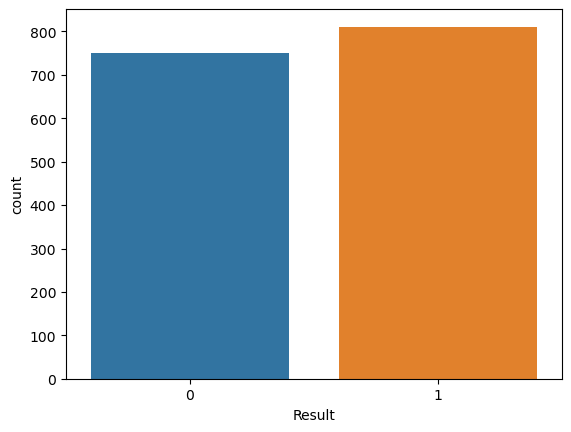

In [19]:
sns.countplot(x=y)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

## 1. Training Data using LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred_lr = lr.predict(x_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2 = r2_score(y_test, y_pred_lr)*100
r2

61.266441718948414

##  2. Using Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [28]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_pred = clf.predict(x_test)

In [62]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,

In [31]:
result  =pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(result)

      Actual  Predicted
319        1          1
1042       0          0
644        1          1
579        1          1
414        1          1
...      ...        ...
720        1          1
411        1          1
1193       0          1
58         1          1
241        1          1

[391 rows x 2 columns]


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [33]:
confusion_matrix(y_test, y_pred)

array([[158,  27],
       [ 17, 189]], dtype=int64)

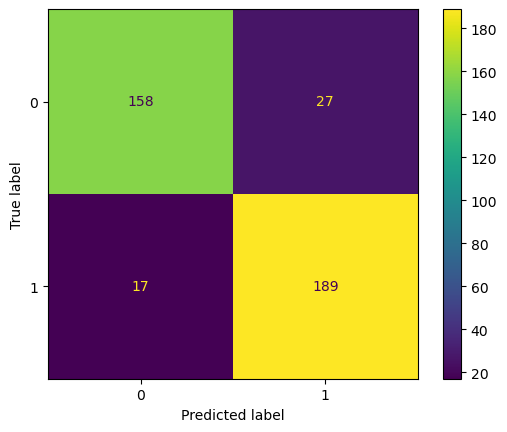

In [34]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [36]:
dt_score = accuracy_score(y_test, y_pred)*100
dt_score

88.7468030690537

In [37]:
# Improving Accuracy Score 

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       185
           1       0.88      0.92      0.90       206

    accuracy                           0.89       391
   macro avg       0.89      0.89      0.89       391
weighted avg       0.89      0.89      0.89       391



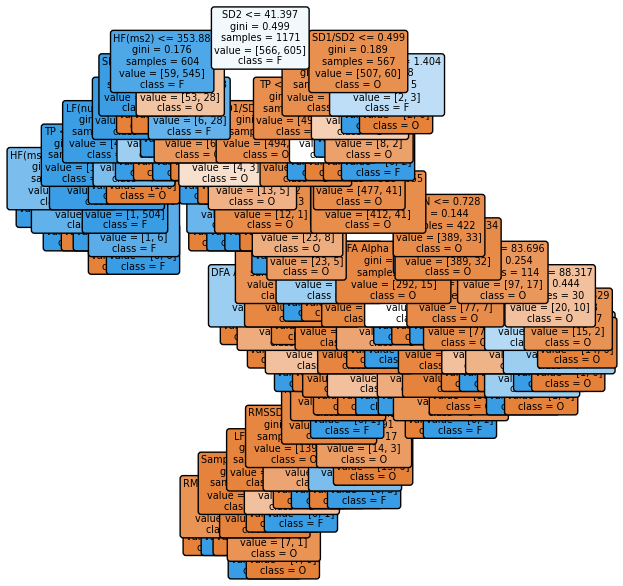

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(7,7))
plot_tree(clf,fontsize=7,rounded=True,filled=True,feature_names=list(x.columns),class_names=['O','F']);

##  3. Using K-Nearest Neighbour Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors = 27)

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [43]:
x_test.shape

(391, 19)

In [44]:
y_knn_pred = knn.predict(x_test)

In [45]:
y_knn_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,

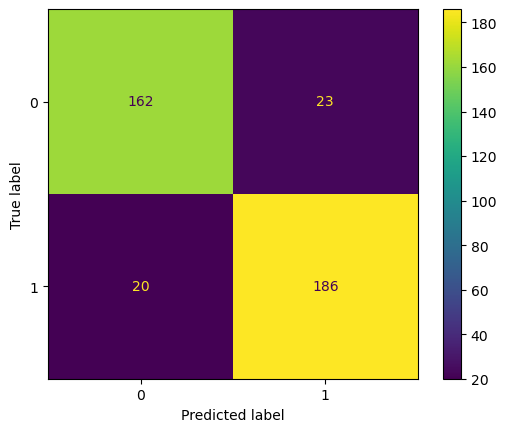

In [46]:
cknn = confusion_matrix(y_test, y_knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cknn)
disp.plot()

plt.show()

In [47]:
knn_score = accuracy_score(y_test,y_knn_pred)*100
knn_score

89.00255754475704

###  Using Hyperparameter Tuning 

In [48]:
params = {
    'n_neighbors': [5,7,8,12,15,17,21,24,28],
    'weights':['unifrom','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute']
}

In [49]:
# import grid search algorithm
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, scoring = 'accuracy',cv=5)

In [50]:
grid.fit(x_train,y_train);

In [51]:
y_pred_grid = grid.predict(x_test)

In [52]:
knn_grid_score = accuracy_score(y_test, y_pred_grid)*100
knn_grid_score

90.28132992327366

## 4. Using Random Forest Algorithm

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [54]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
y_pred_rfc = rfc.predict(x_test)

In [56]:
classification_report(y_test,y_pred_rfc)

'              precision    recall  f1-score   support\n\n           0       0.91      0.98      0.94       185\n           1       0.98      0.91      0.94       206\n\n    accuracy                           0.94       391\n   macro avg       0.94      0.95      0.94       391\nweighted avg       0.95      0.94      0.94       391\n'

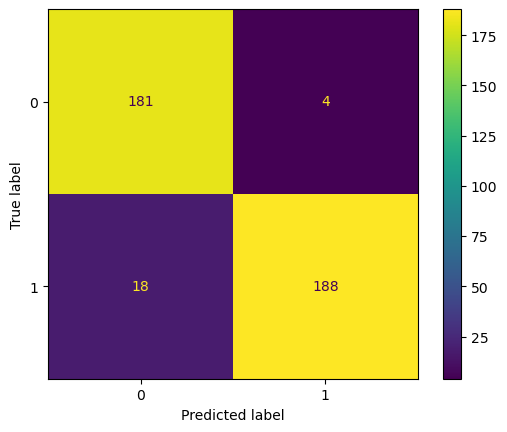

In [57]:
c_matrix = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()

plt.show()

In [58]:
rfc_score = accuracy_score(y_test, y_pred_rfc)*100
rfc_score

94.37340153452686

In [59]:
print("Linear Regression :", r2)
print("Decision Tree Algorithm :" ,dt_score)
print("K Nearest Neightbor : ",knn_score)
print("KNN Hyper parameter tuning", knn_grid_score)
print("Random Forest Algorithm : ",rfc_score)

Linear Regression : 61.266441718948414
Decision Tree Algorithm : 88.7468030690537
K Nearest Neightbor :  89.00255754475704
KNN Hyper parameter tuning 90.28132992327366
Random Forest Algorithm :  94.37340153452686


### * Plotting the Comparision of three algorithms *

In [60]:
algorithms = ['Linear Regression','Decision Tree Classifier', 'K-Nearest Neighbor', 'Random Forest'];
accuracy_scores = [r2, dt_score,knn_grid_score,rfc_score] 

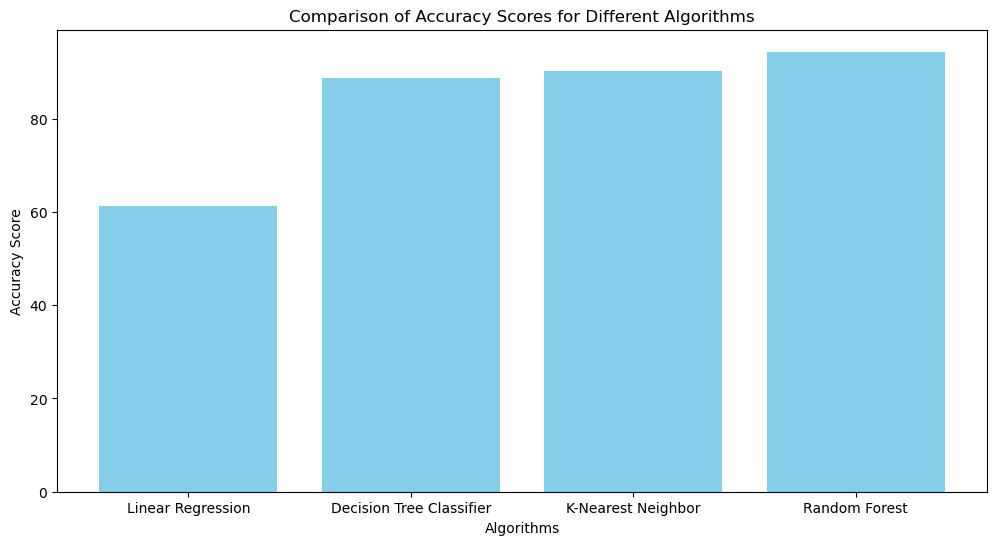

In [61]:
plt.figure(figsize=(12, 6))
plt.bar(algorithms, accuracy_scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Algorithms')
plt.show()

# Results on performance based on Accuracy Score
#### 1. R2 score for linear regression was 61.26%.
#### 2. Accuracy score using decision tree Classifier is 88%.
#### 2. Accuracy score for K Nearest Neighbor is 89%.
#### 3. Accuracy score is increased using Hyperparameter tuning from 89% to 90.5%.
#### 4. Accuracy score for Random Forest Algorithm is 94.117%.